# ERL Reivew Updates

This notebook is to make new figures and tables for ERL Reviews.

By Cascade Tuholske

4-27-19

### Dependencies

In [1]:
from rasterstats import zonal_stats
import rasterio
import geopandas as gpd
import operator
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from functools import reduce
import squarify
from scipy import stats as ss

### Functions

In [2]:
def gini(series):
    
    "Function calculates gini coefficent based on https://zhiyzuo.github.io/Plot-Lorenz/"
    ## series to array
    arr = series.values
    
    ## first sort
    sorted_arr = arr.copy(np.array)
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

### Data

In [3]:
# File paths

# data_raw = '../../data/raw/'
# data_temp = '../../temp_data/'
# data_interim = '../../interim/'
# data_analysis = '/Users/cascade/Github/Pop-ERL/temp_data/ERL19/ERL_data/Data20190222/'
# erl_data = '/Users/cascade/Github/Pop-ERL/temp_data/ERL19/ERL_data/'
# downloads = '/Users/cascade/Downloads/'
# erl_v2_data = '/Users/cascade/Github/Pop-ERL/temp_data/ERL19/ERLv2/'

data_interim = '../../../data/interim/'
erl_v2_data = '../../../temp_data/ERL19v2/'
downloads = '/Users/cascade/Downloads/'
data_analysis = '../../../temp_data/ERL19/ERL_data/Data20190222/'

In [4]:
# ERLv2 Data


GHS2000 = gpd.read_file(erl_v2_data+'GHS2000_polyFINAL_PopTotERLv2.shp')
GHS2015 = gpd.read_file(erl_v2_data+'GHS2015_polyFINAL_PopTotERLv2.shp')
WP2015 = gpd.read_file(erl_v2_data+'WP2015_polyFINAL_PopTotERLv2.shp')
WPE2016 = gpd.read_file(erl_v2_data+'WPE2016_polyFINAL_PopTotERLv2.shp')
LS2015 = gpd.read_file(erl_v2_data+'LS2015_polyFINAL_PopTotERLv2.shp')

In [ ]:
# ERLv1 Data

# GHS2000 = gpd.read_file(data_analysis+'GHS_POP_GPW42000_20190222.shp', driver = 'ESRI Shapefile')
# GHS2015 = gpd.read_file(data_analysis+'GHS_POP_GPW42015_20190222.shp', driver = 'ESRI Shapefile')
# WP2000 = gpd.read_file(data_analysis+'AFR_PPP_2000_adj_v2_20190222.shp', driver = 'ESRI Shapefile')
# WP2015 = gpd.read_file(data_analysis+'AFR_PPP_2015_adj_v2_20190222.shp', driver = 'ESRI Shapefile')
# LS2015 = gpd.read_file(data_analysis+'WPE_1KM_2016_20190222.shp', driver = 'ESRI Shapefile')
# WPE2016 = gpd.read_file(data_analysis+'LS15_20190222.shp', driver = 'ESRI Shapefile')

In [5]:
# Drop <5000
print(len(WP2015))
GHS2000 = GHS2000[GHS2000['PopTot'] > 5000]
GHS2015 = GHS2015[GHS2015['PopTot'] > 5000]
WP2015 = WP2015[WP2015['PopTot'] > 5000]
WPE2016 = WPE2016[WPE2016['PopTot'] > 5000]
LS2015 = LS2015[LS2015['PopTot'] > 5000]
print(len(WP2015))


2752
2536


In [6]:
# Add dataset col

GHS2000['dataset'] = 'GHS-Pop 2000'
GHS2015['dataset'] = 'GHS-Pop 2015'
WP2015['dataset'] = 'WP 2015'
WPE2016['dataset'] = 'WPE 2016'
LS2015['dataset'] = 'LandScan 2015'

In [7]:
# Fix DRC Issue
GHS2015[GHS2015['country'] == 'Democratic Republic of Congo']

,osm_id,FID,country,osm_name,osm_type,lat,lon,clippoly,PopTot,aez_class,rain_zone,geometry,dataset
5418,29827644,14178,Democratic Republic of Congo,Bacongo,town,-4.29686,15.25130,yes,5.792001e+06,Tropic - warm / subhumid,NA,"POLYGON ((1547405.452556 -559970.538132, 15474...",GHS-Pop 2015
5430,435390255,16849,Democratic Republic of Congo,Cyangugu,town,-2.48878,28.89581,yes,1.067327e+06,Tropic - cool / humid,NA,"(POLYGON ((2891405.452556 -316970.5381320001, ...",GHS-Pop 2015
5433,435401870,18136,Democratic Republic of Congo,Ruhondo,town,-1.53129,29.72126,yes,8.974741e+05,Tropic - cool / humid,NA,"(POLYGON ((2930008.67902236 -210970.538132, 29...",GHS-Pop 2015
5440,435315432,27676,Democratic Republic of Congo,Zongo,town,4.34367,18.59459,yes,3.439372e+04,Tropic - warm / humid,NA,"POLYGON ((1862409.091058616 538029.4618679999,...",GHS-Pop 2015


In [8]:
GHS2000 = GHS2000.replace(to_replace= 'Democratic Republic of Congo', value = 'Democratic Republic of the Congo')
GHS2015 = GHS2015.replace(to_replace= 'Democratic Republic of Congo', value = 'Democratic Republic of the Congo')
WP2015 = WP2015.replace(to_replace= 'Democratic Republic of Congo', value = 'Democratic Republic of the Congo')
WPE2016 = WPE2016.replace(to_replace= 'Democratic Republic of Congo', value = 'Democratic Republic of the Congo')
LS2015 = LS2015.replace(to_replace= 'Democratic Republic of Congo', value = 'Democratic Republic of the Congo')

In [9]:
GHS2015[GHS2015['country'] == 'Democratic Republic of Congo']

,osm_id,FID,country,osm_name,osm_type,lat,lon,clippoly,PopTot,aez_class,rain_zone,geometry,dataset


In [10]:
all_data = [GHS2000,GHS2015,WP2015,WPE2016,LS2015]

### Numbers

In [ ]:
for data in all_data:
    print(data.PopTot.sum())


In [ ]:
(607248948.927412-382683256.7297058)/382683256.7297058



In [ ]:
for data in all_data:
#     pop = data.loc[(data['PopTot'] >= 10**5) & (data['PopTot'] <=3*10**5), 'PopTot'].sum()
    pop= data.loc[(data['PopTot'] <= 10**5), 'PopTot'].sum()


    tot = data.PopTot.sum()
    out = pop/tot*100

    print(pop)
    print(out)

#### Africa chunks

In [ ]:
# LS2015 Chunks
LS2015_50k = LS2015.loc[(LS2015['PopTot'] <= 5*10**4), 'PopTot'].sum()
print(LS2015_50k)

LS2015_100k = LS2015.loc[(LS2015['PopTot'] > 5*10**4) & (LS2015['PopTot'] <= 10**5), 'PopTot'].sum()
print(LS2015_100k)

LS2015_300k = LS2015.loc[(LS2015['PopTot'] > 10**5) & (LS2015['PopTot'] <= 3*10**5), 'PopTot'].sum()
print(LS2015_300k)

LS2015_500k = LS2015.loc[(LS2015['PopTot'] > 3*10**5) & (LS2015['PopTot'] <= 5*10**5), 'PopTot'].sum()
print(LS2015_500k)

LS2015_1m = LS2015.loc[(LS2015['PopTot'] > 5*10**5) & (LS2015['PopTot'] <= 10**6), 'PopTot'].sum()
print(LS2015_1m)

LS2015_5m = LS2015.loc[(LS2015['PopTot'] > 10**6) & (LS2015['PopTot'] <= 5*10**6), 'PopTot'].sum()
print(LS2015_5m)

LS2015_10m = LS2015.loc[(LS2015['PopTot'] > 5*10**6) & (LS2015['PopTot'] <= 10**7), 'PopTot'].sum()
print(LS2015_5m)

LS2015_10mplus = LS2015.loc[(LS2015['PopTot'] > 10**7), 'PopTot'].sum()
print(LS2015_10mplus)

LS2015_chunks = [LS2015_50k, LS2015_100k, LS2015_300k, LS2015_500k, LS2015_1m, LS2015_5m, LS2015_10m, LS2015_10mplus]

In [ ]:
# WP2015 Chunks
WP2015_50k = WP2015.loc[(WP2015['PopTot'] <= 5*10**4), 'PopTot'].sum()
print(WP2015_50k)

WP2015_100k = WP2015.loc[(WP2015['PopTot'] > 5*10**4) & (WP2015['PopTot'] <= 10**5), 'PopTot'].sum()
print(WP2015_100k)

WP2015_300k = WP2015.loc[(WP2015['PopTot'] > 10**5) & (WP2015['PopTot'] <= 3*10**5), 'PopTot'].sum()
print(WP2015_300k)

WP2015_500k = WP2015.loc[(WP2015['PopTot'] > 3*10**5) & (WP2015['PopTot'] <= 5*10**5), 'PopTot'].sum()
print(WP2015_500k)

WP2015_1m = WP2015.loc[(WP2015['PopTot'] > 5*10**5) & (WP2015['PopTot'] <= 10**6), 'PopTot'].sum()
print(WP2015_1m)

WP2015_5m = WP2015.loc[(WP2015['PopTot'] > 10**6) & (WP2015['PopTot'] <= 5*10**6), 'PopTot'].sum()
print(WP2015_5m)

WP2015_10m = WP2015.loc[(WP2015['PopTot'] > 5*10**6) & (WP2015['PopTot'] <= 10**7), 'PopTot'].sum()
print(WP2015_5m)

WP2015_10mplus = WP2015.loc[(WP2015['PopTot'] > 10**7), 'PopTot'].sum()
print(WP2015_10mplus)

WP2015_chunks = [WP2015_50k, WP2015_100k, WP2015_300k, WP2015_500k, WP2015_1m, WP2015_5m, WP2015_10m, WP2015_10mplus]

In [ ]:
# WPE2016 Chunks
WPE2016_50k = WPE2016.loc[(WPE2016['PopTot'] <= 5*10**4), 'PopTot'].sum()
print(WPE2016_50k)

WPE2016_100k = WPE2016.loc[(WPE2016['PopTot'] > 5*10**4) & (WPE2016['PopTot'] <= 10**5), 'PopTot'].sum()
print(WPE2016_100k)

WPE2016_300k = WPE2016.loc[(WPE2016['PopTot'] > 10**5) & (WPE2016['PopTot'] <= 3*10**5), 'PopTot'].sum()
print(WPE2016_300k)

WPE2016_500k = WPE2016.loc[(WPE2016['PopTot'] > 3*10**5) & (WPE2016['PopTot'] <= 5*10**5), 'PopTot'].sum()
print(WPE2016_500k)

WPE2016_1m = WPE2016.loc[(WPE2016['PopTot'] > 5*10**5) & (WPE2016['PopTot'] <= 10**6), 'PopTot'].sum()
print(WPE2016_1m)

WPE2016_5m = WPE2016.loc[(WPE2016['PopTot'] > 10**6) & (WPE2016['PopTot'] <= 5*10**6), 'PopTot'].sum()
print(WPE2016_5m)

WPE2016_10m = WPE2016.loc[(WPE2016['PopTot'] > 5*10**6) & (WPE2016['PopTot'] <= 10**7), 'PopTot'].sum()
print(WPE2016_5m)

WPE2016_10mplus = WPE2016.loc[(WPE2016['PopTot'] > 10**7), 'PopTot'].sum()
print(WPE2016_10mplus)

WPE2016_chunks = [WPE2016_50k, WPE2016_100k, WPE2016_300k, WPE2016_500k, WPE2016_1m, WPE2016_5m, WPE2016_10m, WPE2016_10mplus]

In [ ]:
# GHS2015 Chunks
GHS2015_50k = GHS2015.loc[(GHS2015['PopTot'] <= 5*10**4), 'PopTot'].sum()
print(GHS2015_50k)

GHS2015_100k = GHS2015.loc[(GHS2015['PopTot'] > 5*10**4) & (GHS2015['PopTot'] <= 10**5), 'PopTot'].sum()
print(GHS2015_100k)

GHS2015_300k = GHS2015.loc[(GHS2015['PopTot'] > 10**5) & (GHS2015['PopTot'] <= 3*10**5), 'PopTot'].sum()
print(GHS2015_300k)

GHS2015_500k = GHS2015.loc[(GHS2015['PopTot'] > 3*10**5) & (GHS2015['PopTot'] <= 5*10**5), 'PopTot'].sum()
print(GHS2015_500k)

GHS2015_1m = GHS2015.loc[(GHS2015['PopTot'] > 5*10**5) & (GHS2015['PopTot'] <= 10**6), 'PopTot'].sum()
print(GHS2015_1m)

GHS2015_5m = GHS2015.loc[(GHS2015['PopTot'] > 10**6) & (GHS2015['PopTot'] <= 5*10**6), 'PopTot'].sum()
print(GHS2015_5m)

GHS2015_10m = GHS2015.loc[(GHS2015['PopTot'] > 5*10**6) & (GHS2015['PopTot'] <= 10**7), 'PopTot'].sum()
print(GHS2015_5m)

GHS2015_10mplus = GHS2015.loc[(GHS2015['PopTot'] > 10**7), 'PopTot'].sum()
print(GHS2015_10mplus)

GHS2015_chunks = [GHS2015_50k, GHS2015_100k, GHS2015_300k, GHS2015_500k, GHS2015_1m, GHS2015_5m, GHS2015_10m, GHS2015_10mplus]

In [ ]:
# GHS2000 Chunks
GHS2000_50k = GHS2000.loc[(GHS2000['PopTot'] <= 5*10**4), 'PopTot'].sum()
print(GHS2000_50k)

GHS2000_100k = GHS2000.loc[(GHS2000['PopTot'] > 5*10**4) & (GHS2000['PopTot'] <= 10**5), 'PopTot'].sum()
print(GHS2000_100k)

GHS2000_300k = GHS2000.loc[(GHS2000['PopTot'] > 10**5) & (GHS2000['PopTot'] <= 3*10**5), 'PopTot'].sum()
print(GHS2000_300k)

GHS2000_500k = GHS2000.loc[(GHS2000['PopTot'] > 3*10**5) & (GHS2000['PopTot'] <= 5*10**5), 'PopTot'].sum()
print(GHS2000_500k)

GHS2000_1m = GHS2000.loc[(GHS2000['PopTot'] > 5*10**5) & (GHS2000['PopTot'] <= 10**6), 'PopTot'].sum()
print(GHS2000_1m)

GHS2000_5m = GHS2000.loc[(GHS2000['PopTot'] > 10**6) & (GHS2000['PopTot'] <= 5*10**6), 'PopTot'].sum()
print(GHS2000_5m)

GHS2000_10m = GHS2000.loc[(GHS2000['PopTot'] > 5*10**6) & (GHS2000['PopTot'] <= 10**7), 'PopTot'].sum()
print(GHS2000_5m)

GHS2000_10mplus = GHS2000.loc[(GHS2000['PopTot'] > 10**7), 'PopTot'].sum()
print(GHS2000_10mplus)

GHS2000_chunks = [GHS2000_50k, GHS2000_100k, GHS2000_300k, GHS2000_500k, GHS2000_1m, GHS2000_5m, GHS2000_10m, GHS2000_10mplus]

#### Rain Zones

In [ ]:
# Chunk by Rain Zone 

# GHS 2000
GHS2000_arid = GHS2000[GHS2000['rain_zone'] == 'Arid']
GHS2000_semi = GHS2000[GHS2000['rain_zone'] == 'Semi-arid']
GHS2000_sub = GHS2000[GHS2000['rain_zone'] == 'Sub-humid']
GHS2000_humid = GHS2000[GHS2000['rain_zone'] == 'Humid']

# GHS 2015
GHS2015_arid = GHS2015[GHS2015['rain_zone'] == 'Arid']
GHS2015_semi = GHS2015[GHS2015['rain_zone'] == 'Semi-arid']
GHS2015_sub = GHS2015[GHS2015['rain_zone'] == 'Sub-humid']
GHS2015_humid = GHS2015[GHS2015['rain_zone'] == 'Humid']


#### GHS 2000

In [ ]:
# GHS 2000 Arid Chunks 
GHS2000_arid_50k = GHS2000_arid.loc[(GHS2000_arid['PopTot'] <= 5*10**4), 'PopTot'].sum()
print(GHS2000_arid_50k)

GHS2000_arid_100k = GHS2000_arid.loc[(GHS2000_arid['PopTot'] > 5*10**4) & (GHS2000_arid['PopTot'] <= 10**5), 'PopTot'].sum()
print(GHS2000_arid_100k)

GHS2000_arid_300k = GHS2000_arid.loc[(GHS2000_arid['PopTot'] > 10**5) & (GHS2000_arid['PopTot'] <= 3*10**5), 'PopTot'].sum()
print(GHS2000_arid_300k)

GHS2000_arid_500k = GHS2000_arid.loc[(GHS2000_arid['PopTot'] > 3*10**5) & (GHS2000_arid['PopTot'] <= 5*10**5), 'PopTot'].sum()
print(GHS2000_arid_500k)

GHS2000_arid_1m = GHS2000_arid.loc[(GHS2000_arid['PopTot'] > 5*10**5) & (GHS2000_arid['PopTot'] <= 10**6), 'PopTot'].sum()
print(GHS2000_arid_1m)

GHS2000_arid_5m = GHS2000_arid.loc[(GHS2000_arid['PopTot'] > 10**6) & (GHS2000_arid['PopTot'] <= 5*10**6), 'PopTot'].sum()
print(GHS2000_arid_5m)

GHS2000_arid_5mplus = GHS2000_arid.loc[(GHS2000_arid['PopTot'] > 5*10**6), 'PopTot'].sum()
print(GHS2000_arid_5mplus)

GHS2000_arid_chunks = [GHS2000_arid_50k, GHS2000_arid_100k, GHS2000_arid_300k, GHS2000_arid_500k,
                      GHS2000_arid_1m, GHS2000_arid_5m, GHS2000_arid_5mplus]


In [ ]:
# GHS Semi Arid Chunks 
GHS2000_semi_50k = GHS2000_semi.loc[(GHS2000_semi['PopTot'] <= 5*10**4), 'PopTot'].sum()
print(GHS2000_semi_50k)

GHS2000_semi_100k = GHS2000_semi.loc[(GHS2000_semi['PopTot'] > 5*10**4) & (GHS2000_semi['PopTot'] <= 10**5), 'PopTot'].sum()
print(GHS2000_semi_100k)

GHS2000_semi_300k = GHS2000_semi.loc[(GHS2000_semi['PopTot'] > 10**5) & (GHS2000_semi['PopTot'] <= 3*10**5), 'PopTot'].sum()
print(GHS2000_semi_300k)

GHS2000_semi_500k = GHS2000_semi.loc[(GHS2000_semi['PopTot'] > 3*10**5) & (GHS2000_semi['PopTot'] <= 5*10**5), 'PopTot'].sum()
print(GHS2000_semi_500k)

GHS2000_semi_1m = GHS2000_semi.loc[(GHS2000_semi['PopTot'] > 5*10**5) & (GHS2000_semi['PopTot'] <= 10**6), 'PopTot'].sum()
print(GHS2000_semi_1m)

GHS2000_semi_5m = GHS2000_semi.loc[(GHS2000_semi['PopTot'] > 10**6) & (GHS2000_semi['PopTot'] <= 5*10**6), 'PopTot'].sum()
print(GHS2000_semi_5m)

GHS2000_semi_5mplus = GHS2000_semi.loc[(GHS2000_semi['PopTot'] > 5*10**6), 'PopTot'].sum()
print(GHS2000_semi_5mplus)

GHS2000_semi_chunks = [GHS2000_semi_50k, GHS2000_semi_100k, GHS2000_semi_300k, GHS2000_semi_500k,
                      GHS2000_semi_1m, GHS2000_semi_5m, GHS2000_semi_5mplus]

In [ ]:
# GHS Sub Humid Chunks 
GHS2000_sub_50k = GHS2000_sub.loc[(GHS2000_sub['PopTot'] <= 5*10**4), 'PopTot'].sum()
print(GHS2000_sub_50k)

GHS2000_sub_100k = GHS2000_sub.loc[(GHS2000_sub['PopTot'] > 5*10**4) & (GHS2000_sub['PopTot'] <= 10**5), 'PopTot'].sum()
print(GHS2000_sub_100k)

GHS2000_sub_300k = GHS2000_sub.loc[(GHS2000_sub['PopTot'] > 10**5) & (GHS2000_sub['PopTot'] <= 3*10**5), 'PopTot'].sum()
print(GHS2000_sub_300k)

GHS2000_sub_500k = GHS2000_sub.loc[(GHS2000_sub['PopTot'] > 3*10**5) & (GHS2000_sub['PopTot'] <= 5*10**5), 'PopTot'].sum()
print(GHS2000_sub_500k)

GHS2000_sub_1m = GHS2000_sub.loc[(GHS2000_sub['PopTot'] > 5*10**5) & (GHS2000_sub['PopTot'] <= 10**6), 'PopTot'].sum()
print(GHS2000_sub_1m)

GHS2000_sub_5m = GHS2000_sub.loc[(GHS2000_sub['PopTot'] > 10**6) & (GHS2000_sub['PopTot'] <= 5*10**6), 'PopTot'].sum()
print(GHS2000_sub_5m)

GHS2000_sub_5mplus = GHS2000_sub.loc[(GHS2000_sub['PopTot'] > 5*10**6), 'PopTot'].sum()
print(GHS2000_sub_5mplus)

GHS2000_sub_chunks = [GHS2000_sub_50k, GHS2000_sub_100k, GHS2000_sub_300k, GHS2000_sub_500k,
                      GHS2000_sub_1m, GHS2000_sub_5m, GHS2000_sub_5mplus]

In [ ]:
# GHS Humid Chunks 
GHS2000_humid_50k = GHS2000_humid.loc[(GHS2000_humid['PopTot'] <= 5*10**4), 'PopTot'].sum()
print(GHS2000_humid_50k)

GHS2000_humid_100k = GHS2000_humid.loc[(GHS2000_humid['PopTot'] > 5*10**4) & (GHS2000_humid['PopTot'] <= 10**5), 'PopTot'].sum()
print(GHS2000_humid_100k)

GHS2000_humid_300k = GHS2000_humid.loc[(GHS2000_humid['PopTot'] > 10**5) & (GHS2000_humid['PopTot'] <= 3*10**5), 'PopTot'].sum()
print(GHS2000_humid_300k)

GHS2000_humid_500k = GHS2000_humid.loc[(GHS2000_humid['PopTot'] > 3*10**5) & (GHS2000_humid['PopTot'] <= 5*10**5), 'PopTot'].sum()
print(GHS2000_humid_500k)

GHS2000_humid_1m = GHS2000_humid.loc[(GHS2000_humid['PopTot'] > 5*10**5) & (GHS2000_humid['PopTot'] <= 10**6), 'PopTot'].sum()
print(GHS2000_humid_1m)

GHS2000_humid_5m = GHS2000_humid.loc[(GHS2000_humid['PopTot'] > 10**6) & (GHS2000_humid['PopTot'] <= 5*10**6), 'PopTot'].sum()
print(GHS2000_humid_5m)

GHS2000_humid_5mplus = GHS2000_humid.loc[(GHS2000_humid['PopTot'] > 5*10**6), 'PopTot'].sum()
print(GHS2000_humid_5mplus)

GHS2000_humid_chunks = [GHS2000_humid_50k, GHS2000_humid_100k, GHS2000_humid_300k, GHS2000_humid_500k,
                      GHS2000_humid_1m, GHS2000_humid_5m, GHS2000_humid_5mplus]

#### GHS 2015

In [ ]:
# GHS 2015 Arid Chunks 
GHS2015_arid_50k = GHS2015_arid.loc[(GHS2015_arid['PopTot'] <= 5*10**4), 'PopTot'].sum()
print(GHS2015_arid_50k)

GHS2015_arid_100k = GHS2015_arid.loc[(GHS2015_arid['PopTot'] > 5*10**4) & (GHS2015_arid['PopTot'] <= 10**5), 'PopTot'].sum()
print(GHS2015_arid_100k)

GHS2015_arid_300k = GHS2015_arid.loc[(GHS2015_arid['PopTot'] > 10**5) & (GHS2015_arid['PopTot'] <= 3*10**5), 'PopTot'].sum()
print(GHS2015_arid_300k)

GHS2015_arid_500k = GHS2015_arid.loc[(GHS2015_arid['PopTot'] > 3*10**5) & (GHS2015_arid['PopTot'] <= 5*10**5), 'PopTot'].sum()
print(GHS2015_arid_500k)

GHS2015_arid_1m = GHS2015_arid.loc[(GHS2015_arid['PopTot'] > 5*10**5) & (GHS2015_arid['PopTot'] <= 10**6), 'PopTot'].sum()
print(GHS2015_arid_1m)

GHS2015_arid_5m = GHS2015_arid.loc[(GHS2015_arid['PopTot'] > 10**6) & (GHS2015_arid['PopTot'] <= 5*10**6), 'PopTot'].sum()
print(GHS2015_arid_5m)

GHS2015_arid_5mplus = GHS2015_arid.loc[(GHS2015_arid['PopTot'] > 5*10**6), 'PopTot'].sum()
print(GHS2015_arid_5mplus)

GHS2015_arid_chunks = [GHS2015_arid_50k, GHS2015_arid_100k, GHS2015_arid_300k, GHS2015_arid_500k,
                      GHS2015_arid_1m, GHS2015_arid_5m, GHS2015_arid_5mplus]


In [ ]:
# GHS Semi Arid Chunks 
GHS2015_semi_50k = GHS2015_semi.loc[(GHS2015_semi['PopTot'] <= 5*10**4), 'PopTot'].sum()
print(GHS2015_semi_50k)

GHS2015_semi_100k = GHS2015_semi.loc[(GHS2015_semi['PopTot'] > 5*10**4) & (GHS2015_semi['PopTot'] <= 10**5), 'PopTot'].sum()
print(GHS2015_semi_100k)

GHS2015_semi_300k = GHS2015_semi.loc[(GHS2015_semi['PopTot'] > 10**5) & (GHS2015_semi['PopTot'] <= 3*10**5), 'PopTot'].sum()
print(GHS2015_semi_300k)

GHS2015_semi_500k = GHS2015_semi.loc[(GHS2015_semi['PopTot'] > 3*10**5) & (GHS2015_semi['PopTot'] <= 5*10**5), 'PopTot'].sum()
print(GHS2015_semi_500k)

GHS2015_semi_1m = GHS2015_semi.loc[(GHS2015_semi['PopTot'] > 5*10**5) & (GHS2015_semi['PopTot'] <= 10**6), 'PopTot'].sum()
print(GHS2015_semi_1m)

GHS2015_semi_5m = GHS2015_semi.loc[(GHS2015_semi['PopTot'] > 10**6) & (GHS2015_semi['PopTot'] <= 5*10**6), 'PopTot'].sum()
print(GHS2015_semi_5m)

GHS2015_semi_5mplus = GHS2015_semi.loc[(GHS2015_semi['PopTot'] > 5*10**6), 'PopTot'].sum()
print(GHS2015_semi_5mplus)

GHS2015_semi_chunks = [GHS2015_semi_50k, GHS2015_semi_100k, GHS2015_semi_300k, GHS2015_semi_500k,
                      GHS2015_semi_1m, GHS2015_semi_5m, GHS2015_semi_5mplus]

In [ ]:
# GHS Sub Humid Chunks 
GHS2015_sub_50k = GHS2015_sub.loc[(GHS2015_sub['PopTot'] <= 5*10**4), 'PopTot'].sum()
print(GHS2015_sub_50k)

GHS2015_sub_100k = GHS2015_sub.loc[(GHS2015_sub['PopTot'] > 5*10**4) & (GHS2015_sub['PopTot'] <= 10**5), 'PopTot'].sum()
print(GHS2015_sub_100k)

GHS2015_sub_300k = GHS2015_sub.loc[(GHS2015_sub['PopTot'] > 10**5) & (GHS2015_sub['PopTot'] <= 3*10**5), 'PopTot'].sum()
print(GHS2015_sub_300k)

GHS2015_sub_500k = GHS2015_sub.loc[(GHS2015_sub['PopTot'] > 3*10**5) & (GHS2015_sub['PopTot'] <= 5*10**5), 'PopTot'].sum()
print(GHS2015_sub_500k)

GHS2015_sub_1m = GHS2015_sub.loc[(GHS2015_sub['PopTot'] > 5*10**5) & (GHS2015_sub['PopTot'] <= 10**6), 'PopTot'].sum()
print(GHS2015_sub_1m)

GHS2015_sub_5m = GHS2015_sub.loc[(GHS2015_sub['PopTot'] > 10**6) & (GHS2015_sub['PopTot'] <= 5*10**6), 'PopTot'].sum()
print(GHS2015_sub_5m)

GHS2015_sub_5mplus = GHS2015_sub.loc[(GHS2015_sub['PopTot'] > 5*10**6), 'PopTot'].sum()
print(GHS2015_sub_5mplus)

GHS2015_sub_chunks = [GHS2015_sub_50k, GHS2015_sub_100k, GHS2015_sub_300k, GHS2015_sub_500k,
                      GHS2015_sub_1m, GHS2015_sub_5m, GHS2015_sub_5mplus]

In [ ]:
# GHS Humid Chunks 
GHS2015_humid_50k = GHS2015_humid.loc[(GHS2015_humid['PopTot'] <= 5*10**4), 'PopTot'].sum()
print(GHS2015_humid_50k)

GHS2015_humid_100k = GHS2015_humid.loc[(GHS2015_humid['PopTot'] > 5*10**4) & (GHS2015_humid['PopTot'] <= 10**5), 'PopTot'].sum()
print(GHS2015_humid_100k)

GHS2015_humid_300k = GHS2015_humid.loc[(GHS2015_humid['PopTot'] > 10**5) & (GHS2015_humid['PopTot'] <= 3*10**5), 'PopTot'].sum()
print(GHS2015_humid_300k)

GHS2015_humid_500k = GHS2015_humid.loc[(GHS2015_humid['PopTot'] > 3*10**5) & (GHS2015_humid['PopTot'] <= 5*10**5), 'PopTot'].sum()
print(GHS2015_humid_500k)

GHS2015_humid_1m = GHS2015_humid.loc[(GHS2015_humid['PopTot'] > 5*10**5) & (GHS2015_humid['PopTot'] <= 10**6), 'PopTot'].sum()
print(GHS2015_humid_1m)

GHS2015_humid_5m = GHS2015_humid.loc[(GHS2015_humid['PopTot'] > 10**6) & (GHS2015_humid['PopTot'] <= 5*10**6), 'PopTot'].sum()
print(GHS2015_humid_5m)

GHS2015_humid_5mplus = GHS2015_humid.loc[(GHS2015_humid['PopTot'] > 5*10**6), 'PopTot'].sum()
print(GHS2015_humid_5mplus)

GHS2015_humid_chunks = [GHS2015_humid_50k, GHS2015_humid_100k, GHS2015_humid_300k, GHS2015_humid_500k,
                      GHS2015_humid_1m, GHS2015_humid_5m, GHS2015_humid_5mplus]

### Bar Plots

In [ ]:
# Bar plot by Dataset for 2015

import matplotlib.pyplot as plt

dictionary = plt.figure()

# Tick Lables
ticks_bar = ['<50K', '50-100K', '100-300K','300-500K', '500K-1M', '1-5M' , '5M-10m', '>10m']

# make plot
sns.set(font_scale=3)
fig, ax = plt.subplots(nrows=1, ncols=1)

# Bar locations
a = [0-.3,1-.3,2-.3,3-.3,4-.3,5-.3,6-.3,7-.3]
b = [0-.15,1-.15,2-.15,3-.15,4-.15,5-.15,6-.15,7-.15]
c = [0,1,2,3,4,5,6,7]
d = [0+.15,1+.15,2+.15,3+.15,4+.15,5+.15,6+.15,7+.15]
e = [0+.3,1+.3,2+.3,3+.3,4+.3,5+.3,6+.3,7+.3]

#3cdbd1 ... blue # 793F98 purple

# Bars
plt.bar(a, [x / 10**6 for x in GHS2000_chunks], width=0.15, align='center', alpha  = 0.7, color = '#3cdbd1')
plt.bar(b, [x / 10**6 for x in GHS2015_chunks], width=0.15, align='center', alpha  = 0.7, color = 'Blue')
plt.bar(c, [x / 10**6 for x in WP2015_chunks], width=0.15, align='center', alpha  = 0.7, color = 'Orange')
plt.bar(d, [x / 10**6 for x in LS2015_chunks], width=0.15, align='center', alpha  = 0.7, color = 'Green')
plt.bar(e, [x / 10**6 for x in WPE2016_chunks], width=0.15, align='center', alpha = 0.7, color = 'Purple')

# Legend 
bar_leg = ['GHS-Pop 2000', 'GHS-Pop 2015','WorldPop 2015', 'LandScan 2015', 'WPE 2016']
plt.legend(bar_leg,loc=2, facecolor= 'white', edgecolor = 'white')

# Ticks
plt.xticks(range(len(ticks_bar)), ticks_bar, size = 28)
#plt.gca().set_yscale('log')

# Size & Color
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(25, 15)
ax.set_facecolor('White')

# Labels 
plt.xlabel('Settlement Size', size = 32)
plt.ylabel('Population (millions)', size = 32)
plt.title('Total Urban Population by Settlement Size for Africa')

# Save
#fig.savefig('/Users/cascade/Desktop/'+'PopAll_bar.png', dpi=700, transparent=False)


In [ ]:
# Bar plot by for GHS 2000 & 2015 

import matplotlib.pyplot as plt

dictionary = plt.figure()

# Tick Lables
ticks_bar = ['<50K', '50-100K', '100-300K','300-500K', '500K-1M', '1-5M' , '5-10M', '>10M']

# make plot
sns.set(font_scale=3)
fig, ax = plt.subplots(nrows=1, ncols=1)

# Bar locations
# a = [0-.4,1-.4,2-.4,3-.4,4-.4,5-.4,6-.4,7-.4]
# b = [0-.2,1-.2,2-.2,3-.2,4-.2,5-.2,6-.2,7-.2]
# c = [0,1,2,3,4,5,6,7]
# d = [0+.2,1+.2,2+.2,3+.2,4+.2,5+.2,6+.2,7+.2]

a = [0-.15,1-.15,2-.15,3-.15,4-.15,5-.15,6-.15,7-.15]
b = [0+.15,1+.15,2+.15,3+.15,4+.15,5+.15,6+.15,7+.15]

# Bars
plt.bar(a, [x / 10**6 for x in GHS2000_chunks], width=0.3, align='center', alpha  = 0.7, color = '#3cdbd1')
plt.bar(b, [x / 10**6 for x in GHS2015_chunks], width=0.3, align='center', alpha  = 0.7, color = '#793F98')

# Legend 
bar_leg = ['GHS-Pop 2000', 'GHS-Pop 2015']
plt.legend(bar_leg,loc=2, facecolor= 'white', edgecolor = 'white')

# Ticks
plt.xticks(range(len(ticks_bar)), ticks_bar, size = 28)
#plt.gca().set_yscale('log')

# Size & Color
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 15)
ax.set_facecolor('White')

# Labels 
plt.xlabel('Settlement Size', size = 32)
plt.ylabel('Population (millions)', size = 32)
plt.title('Total Urban Population by Settlement Size for Africa 2000 & 2015')

# Save
fig.savefig('/Users/cascade/Desktop/'+'Fig5-PopChange_bar.png', dpi=700, transparent=False)


#### Tree Plots

In [ ]:
GHS2000_chunks_pct = np.around(GHS2000_chunks / GHS2000.PopTot.sum() * 100, 1)
GHS2015_chunks_pct = np.around(GHS2015_chunks / GHS2015.PopTot.sum() * 100, 1)

#WP2000_chunks_pct = np.around(WP2000_chunks / WP2000.PopTot.sum() * 100, 1)
WP2015_chunks_pct = np.around(WP2015_chunks / WP2015.PopTot.sum() * 100, 1)

LS2015_chunks_pct = np.around(LS2015_chunks / LS2015.PopTot.sum() * 100, 1)
WPE2016_chunks_pct = np.around(WPE2016_chunks / WPE2016.PopTot.sum() * 100, 1)

In [ ]:
# [a_i - b_i for a_i, b_i in zip(a, b)]


test = [(a-b)/b*100 for a, b in zip(GHS2015_chunks, GHS2000_chunks)] 
test

In [ ]:
data = np.around(GHS2000_chunks)
pct = GHS2000_chunks_pct
chunks = ['<50K:', '50-100K: ', '100-150K: ','250-500K: ', '500K-1M: ', '1-5M: ', '5-10m: ', '10m plus: ']

labels = [chunks[0]+'\n'+str(pct[0])+'%',
         chunks[1]+'\n'+str(pct[1])+'%',
         chunks[2]+'\n'+str(pct[2])+'%',
         chunks[3]+'\n'+str(pct[3])+'%',
         chunks[4]+'\n'+str(pct[4])+'%',
         chunks[5]+'\n'+str(pct[5])+'%',
         chunks[6]+'\n'+str(pct[6])+'%',
         chunks[7]+'\n'+str(pct[7])+'%'
         ]

In [ ]:
# set size
sns.set(font_scale=1.5)

# Set Colors
norm = matplotlib.colors.Normalize(vmin=min(data), vmax=max(data))
colors = [matplotlib.cm.RdPu_r(norm(value)) for value in data]

# Create Plot
fig = plt.figure(figsize=(12, 10))
fig.suptitle("", fontsize=20)
ax = fig.add_subplot(111, aspect='equal')
ax1 = squarify.plot(data, color = colors, label=labels, ax=ax, alpha = 0.7)

# Remove ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('World Population Estimate 2016 \n Urban Settlments Distribution')

# color bar
bar_number = data/(10**6)

# create dummy invisible image with a color map
img = plt.imshow([bar_number], cmap='RdPu_r')
img.set_visible(False)
fig.colorbar(img, orientation="vertical", shrink=.96)
fig.text(.76, .9, "Population in Millions", fontsize=14)

#fig.savefig('/Users/cascade/Desktop/'+'WPE2016_SquarePlot.png', dpi=700

In [ ]:
# Bar plot by for GHS 2000 & 2015 Arid

import matplotlib.pyplot as plt

dictionary = plt.figure()

# Tick Lables
ticks_bar = ['<50K', '50-100K', '100-300K','300-500K', '500K-1M', '1-5M' , '>5M']

# make plot
sns.set(font_scale=3)
fig, ax = plt.subplots(nrows=1, ncols=1)

# Bar locations
c = [0-.4,1-.4,2-.4,3-.4,4-.4,5-.4,6-.4]
d = [0-.1,1-.1,2-.1,3-.1,4-.1,5-.1,6-.1]
a = [0,1,2,3,4,5,6]
b = [0+.1,1+.1,2+.1,3+.1,4+.1,5+.1,6+.1]


# Bars
plt.bar(d, [x / 10**6 for x in GHS2000_humid_chunks], width=0.2, align='center', alpha  = 0.7, color = 'Blue')
plt.bar(b, [x / 10**6 for x in GHS2015_humid_chunks], width=0.2, align='center', alpha  = 0.7, color = 'Green')

# Legend 
bar_leg = ['GHS-Pop 2000', 'GHS-Pop 2015']
plt.legend(bar_leg,loc=2, facecolor= 'white', edgecolor = 'white')

# Ticks
plt.xticks(range(len(ticks_bar)), ticks_bar, size = 28)
#plt.gca().set_yscale('log')

# Size & Color
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(25, 15)
ax.set_facecolor('White')

# Labels 
plt.xlabel('Settlement Size', size = 32)
plt.ylabel('Population (millions)', size = 32)
plt.title('Total Urban Population by Settlement Size for Africa 2000 & 2015')

# Save
# fig.savefig('/Users/cascade/Desktop/'+'PopAll_bar.png', dpi=700, transparent=False)

### Lorenz Curves

In [ ]:
test = GHS2015[GHS2015.PopTot >=5*10**6]
test

In [18]:
# Select Data for Lorenz

# All Africa

area = 'Africa'
X = np.sort(np.array(GHS2000.PopTot))
Y = np.sort(np.array(GHS2015.PopTot))

# # By group
# col = 'rain_zone' # column
# area = 'Humid' # geography to distribut 

# X = np.sort(np.array(GHS2000[GHS2000[col] == area].PopTot))
# Y = np.sort(np.array(GHS2015[GHS2015[col] == area].PopTot))

print(len(X))
print(len(Y))

# Set Limits
X = X[(X < 5*10**6)]
Y = Y[(Y < 5*10**6)]

print(len(X))
print(len(Y))

# Data for curve one
X_lorenz = X.cumsum() / X.sum()
X_lorenz = np.insert(X_lorenz, 0, 0)
X_lorenz[0], X_lorenz[-1]

# Data for curve two 
Y_lorenz = Y.cumsum() / Y.sum()
Y_lorenz = np.insert(Y_lorenz, 0, 0)
Y_lorenz[0], Y_lorenz[-1]

4486
4784
4481
4773


(0.0, 1.0000000000000002)

In [ ]:
# 90th PCT data
data = X
pop = data
pct_pop = data.cumsum() / data.sum()
pct_rank = np.arange(data.size)/(data.size-1)
df = pd.DataFrame()
df['Pop'] = data
df['pct_pop'] = pct_pop
df['pct_rank'] = pct_rank #1.149193e+05 1.445226e+05

In [ ]:
df[df['pct_rank']>=.90]

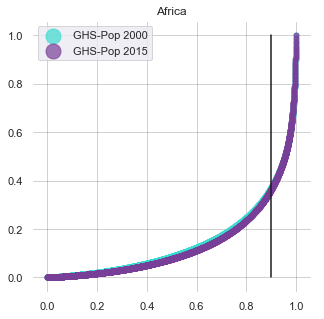

In [20]:
# Lorenz Curve Plot

%matplotlib inline

## Size & number
sns.set(font_scale=3)
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(10, 10))


# Curve Plots
# Alpha for Botswana and S. Leone is 0.7, else 0.5
ax1.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
           marker='.', color='#3cdbd1', s=100, alpha = 0.7) # #3cdbd1 ... blue

ax1.scatter(np.arange(Y_lorenz.size)/(Y_lorenz.size-1), Y_lorenz, 
           marker='.', color='#793F98', s=100, alpha = 0.7) # Pink - '#ff01bc' # 793F98 purple 

# Title
plt.title(area)


# Legend
leg = ['GHS-Pop 2000', 'GHS-Pop 2015']
plt.legend(leg,loc=2, markerscale=3)

## line plot of of 90% 40% 
# ax1.plot([0.9,0.9], [0,1] , color='k', alpha = 0.25)
# ax1.plot([0,1], [0.3,0.3] , color='k', alpha = 0.25)

#remove ticks
# ax.set_xticks([])
# ax.set_yticks([])

# Grid
plt.grid(b=True, color = 'k', alpha = 0.2, marker = '.')

# plt.setp(ax1.xaxis.get_gridlines(), clip_path = [0,1])
# plt.setp(ax1.yaxis.get_gridlines(), clip_path = [[0,0], [1,1]])
plt.figure.frameon = True
ax1.set_facecolor('White')

## line plot of of 90% 40% 
ax1.plot([0.9,0.9], [0,1] , color='k', alpha = 1)
#ax1.plot([0,1], [0.3,0.3] , color='k', alpha = 0.25)

fig.savefig('/Users/cascade/Desktop/'+area+'_Lorenz.png', dpi=700)


### Swarm Plot

In [ ]:
# All data
d = [WP2015, LS2015, GHS2015, WPE2016]
df = pd.concat(d, ignore_index=True)

In [ ]:
sns.set(font_scale=3)
color = ['Blue', 'Green', 'Orange', 'Purple']
fig = plt.subplots(figsize=[20,30])


ax1 = sns.boxplot(y=df.dataset, x=np.log10(df.PopTot), linewidth = 5)

for patch in ax1.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))

ax = sns.swarmplot(y=df.dataset, x=np.log10(df.PopTot), palette = color, size = 4, alpha = 0.7, orient = 'h')
    
# set size
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(25, 15)
#plt.gca().set_xscale('log')

# labels
plt.xlabel('Population')
plt.xticks((4,5,6,7,8), [' $10^4$', '$10^5$', '$10^6$', '$10^7$', '$10^8$'])
plt.ylabel('')
plt.title('Distribution of Urban Settlements by Population Size for Africa')
ax.set_facecolor('White')
plt.tight_layout()

fig.savefig('/Users/cascade/Desktop/'+'PopAll_Swarm.png', dpi=700, transparent=False)

### Descriptives

In [13]:
# All countries

countries = pd.Series(GHS2015.country, dtype="category")

countries = countries.cat.categories.tolist()
len(countries)

52

In [14]:
# Drop Mega

data1 = GHS2000[GHS2000.PopTot < 5*10**6]
data2 = GHS2015[GHS2015.PopTot < 5*10**6]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Non-string object detected for the array ordering. Please pass in 'C', 'F', 'A', or 'K' instead
  
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:107: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:117: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/anaconda3/lib/python3.7/site-packages/scipy/stats/_stat

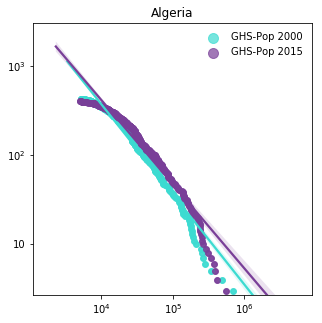

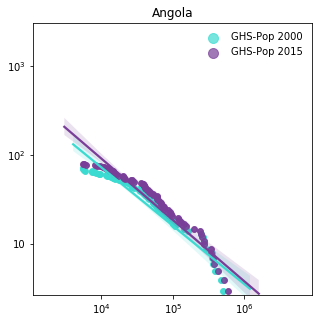

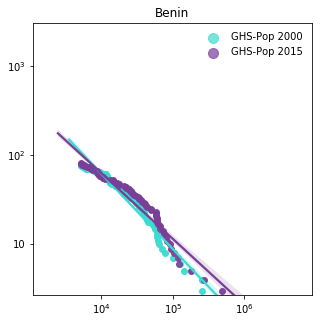

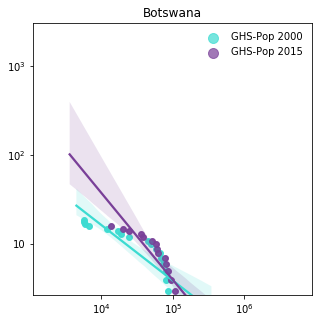

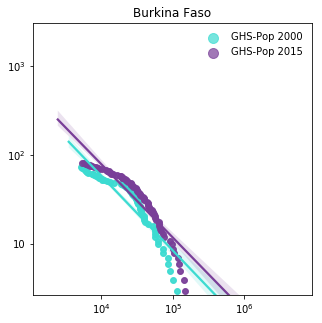

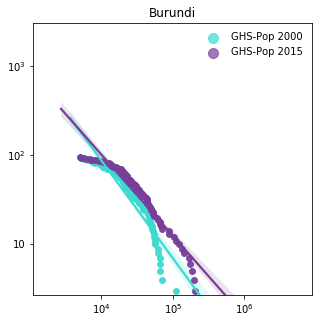

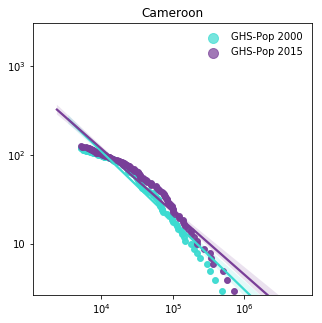

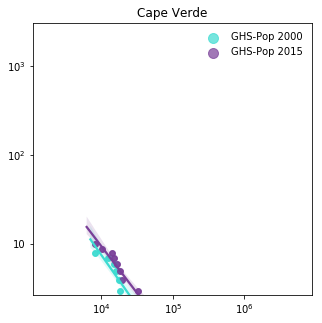

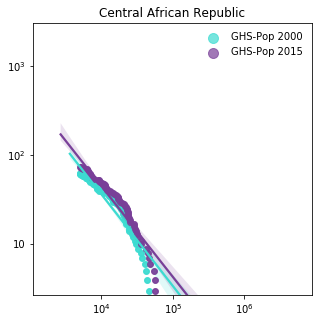

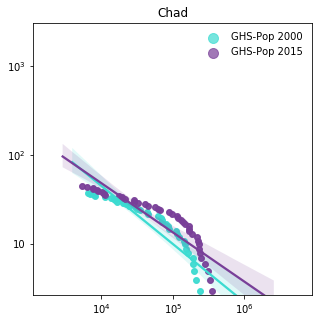

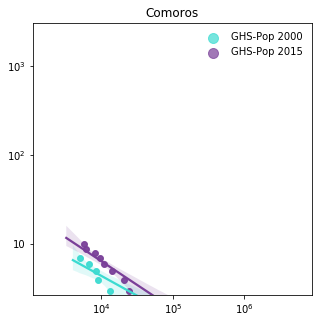

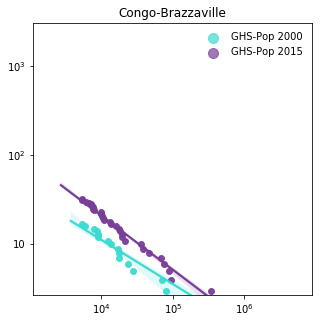

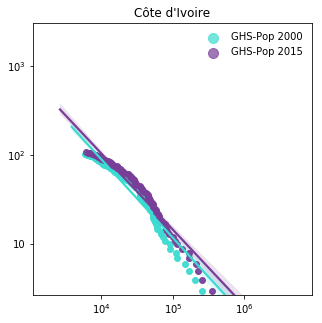

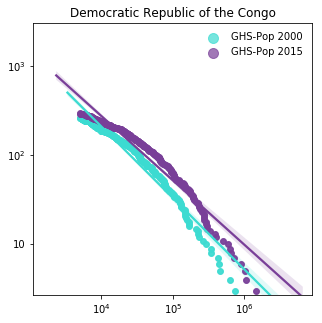

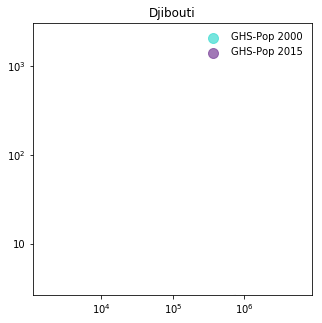

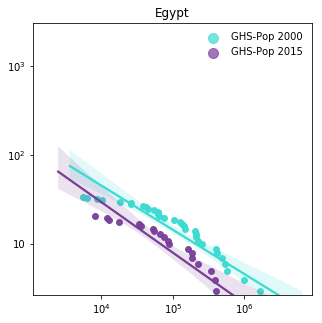

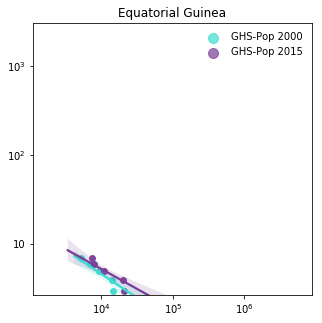

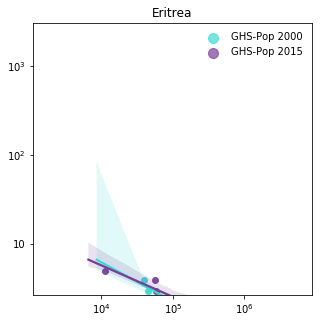

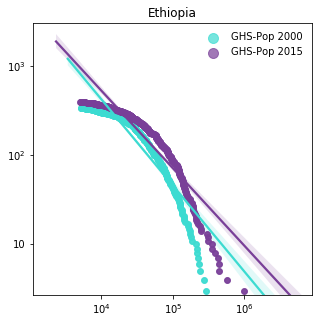

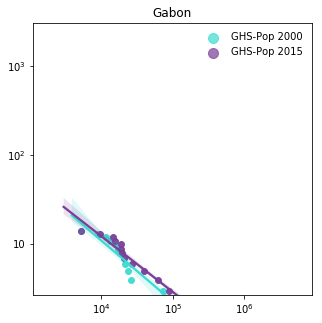

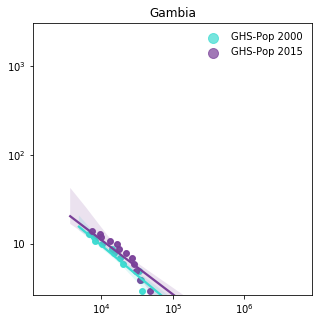

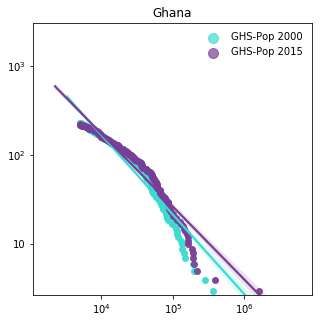

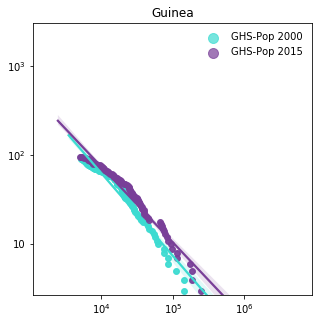

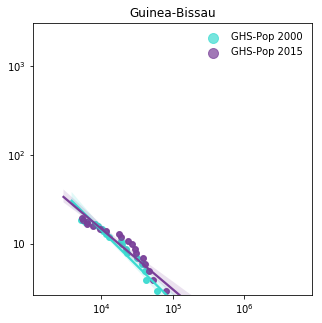

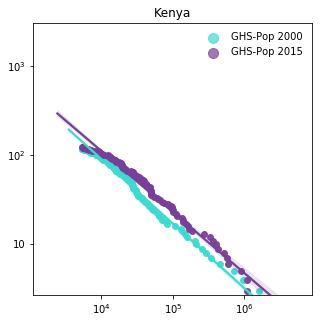

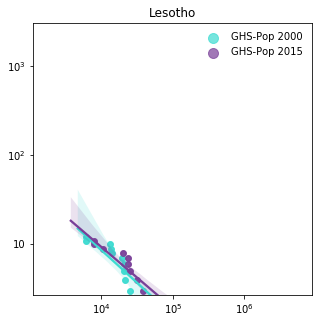

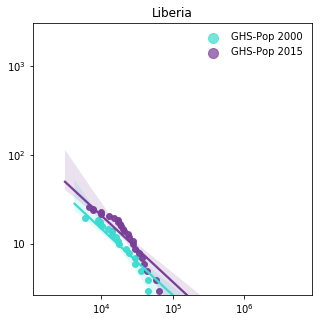

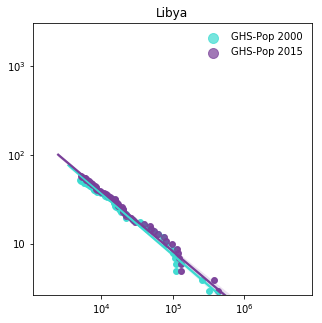

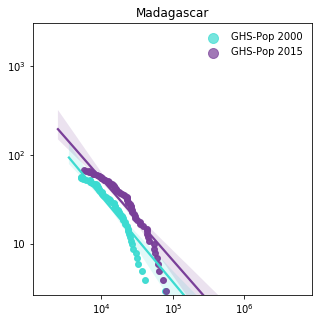

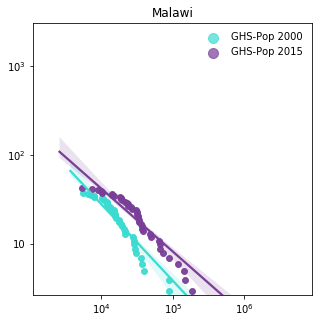

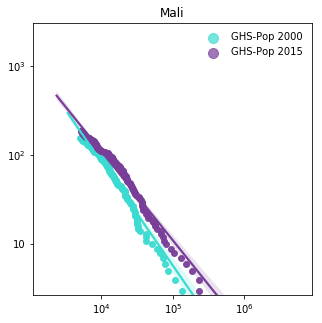

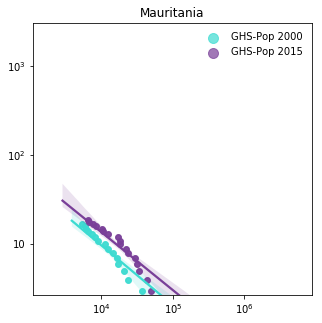

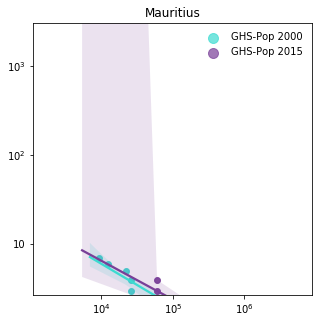

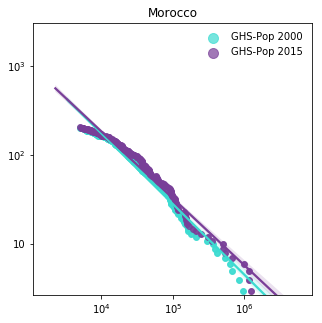

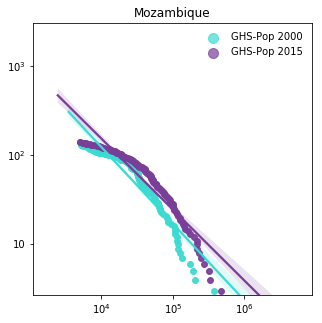

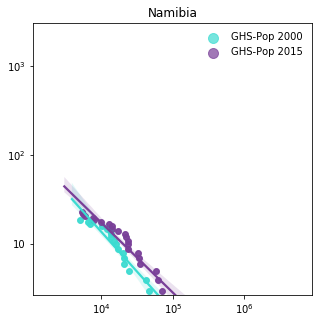

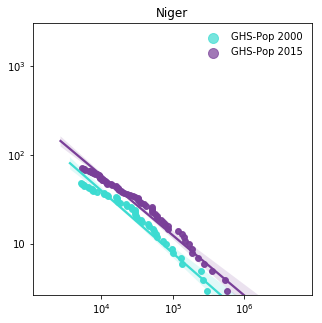

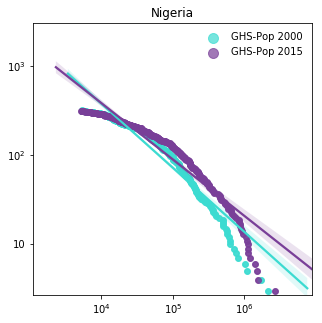

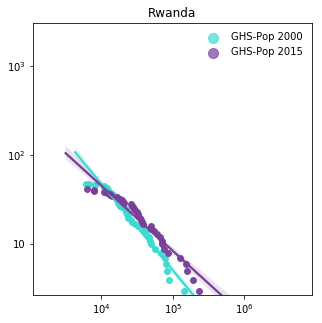

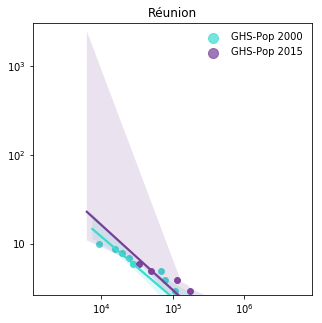

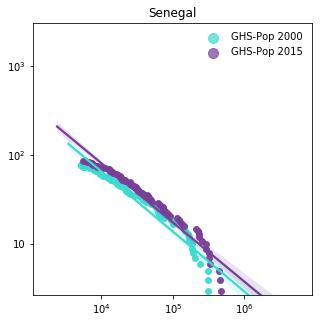

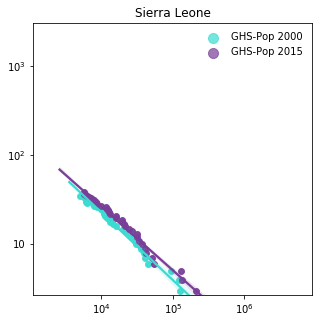

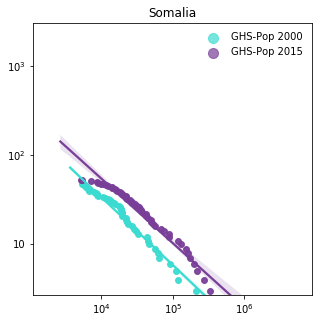

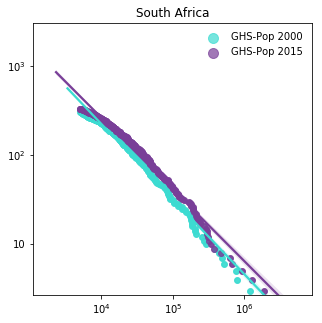

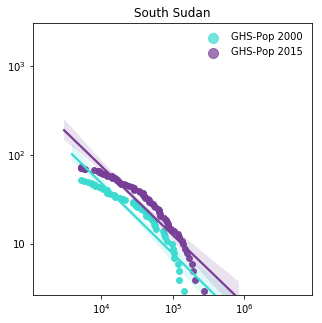

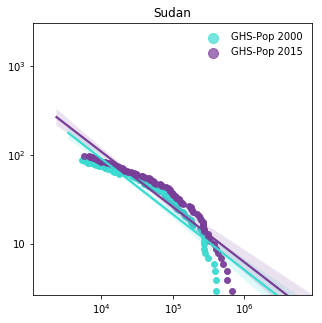

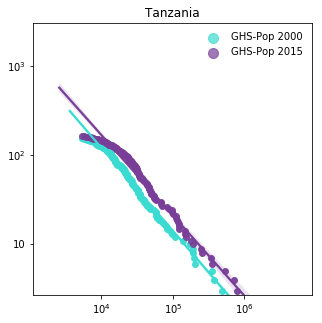

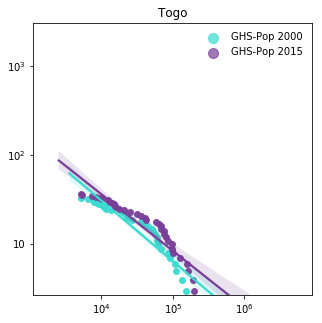

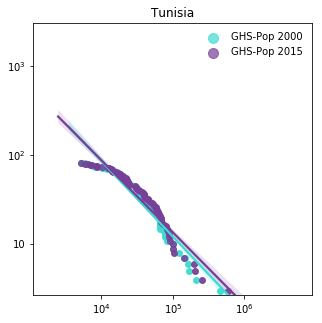

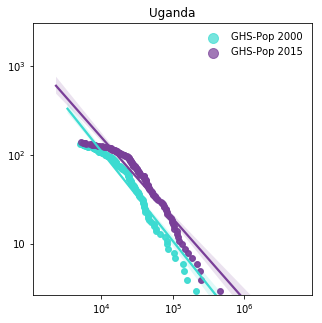

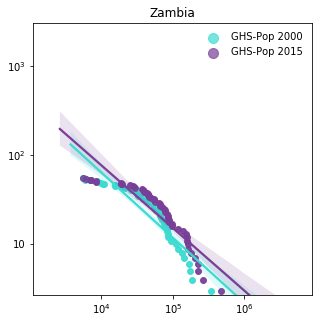

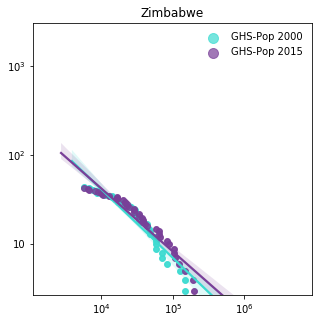

In [15]:
## Descriptives and Zipfs Plots for all countries

# all countires

df = pd.DataFrame()

arr = []


for country in countries: 
    
    test1 = data1[data1['country'] == country]
    test2 = data2[data2['country'] == country]
    
    # counts
    num2000= test1.PopTot.count()
    num2015= test2.PopTot.count()
    
    #Median
    m2000= test1.PopTot.median()
    m2015= test2.PopTot.median()
    
    #gini
 
    g2000 = gini(test1.PopTot)
    g2015 = gini(test2.PopTot)

    #zipf
    X1_zipf = np.sort(test1.PopTot) #sort the values
    Y1_zipf = list(range(1, len(X1_zipf)+1)) # make a range
    Y1_zipf = Y1_zipf[::-1] # Re order range

    X1_zipf_log = np.log(X1_zipf)
    Y1_zipf_log = np.log(Y1_zipf)

    X2_zipf = np.sort(test2.PopTot)
    Y2_zipf = list(range(1, len(X2_zipf)+1))
    Y2_zipf = Y2_zipf[::-1]

    X2_zipf_log = np.log(X2_zipf)
    Y2_zipf_log = np.log(Y2_zipf)
    
    fit1 = ss.linregress(X1_zipf_log, Y1_zipf_log)
    fit2 = ss.linregress(X2_zipf_log, Y2_zipf_log)

    #Fit

    s2000 = fit1[0] # Slope 2000
    p2000 = fit1[4] # p val 2000
    
    s2015 = fit2[0] # Slope 2015
    p2015 = fit2[4] # p val 2015
    
    # Make dataframe
    df[country] = (num2000, num2015, m2000, m2015, g2000, g2015, s2000, p2000, s2015, p2015)

    # Zipf's law

    ## Size & number
    #sns.set(font_scale=3)
    fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(5, 5))

    # Plot - #3cdbd1 blue (2000) & #793F98 purple (2015)
    plt.scatter(X1_zipf_log, Y1_zipf_log , marker='.', color='#3cdbd1', s=100, alpha = 0.7)
    plt.scatter(X2_zipf_log, Y2_zipf_log , marker='.', color='#793F98', s=100, alpha = 0.7)

    # Legend
    leg = ['GHS-Pop 2000', 'GHS-Pop 2015']
    plt.legend(leg,loc=1, markerscale=2, facecolor = 'white', edgecolor = 'white')

    # Fit Lines
    sns.regplot(X1_zipf_log, Y1_zipf_log, color = '#3cdbd1')
    sns.regplot(X2_zipf_log, Y2_zipf_log, color = '#793F98')

    # Title
    plt.title(country)

    # Labels
    plt.xlabel('')
    plt.ylabel('')

    # Set Ticks
    plt.xticks([np.log(10**4), np.log(10**5), np.log(10**6), np.log(10**7)], 
               ['$10^4$', '$10^5$', '$10^6$', '$10^7$'])

    plt.yticks([np.log(10), np.log(100), np.log(1000), np.log(10000),  np.log(100000)], 
               ['10', '$10^2$', '$10^3$', '$10^4$', '$10^5$'])

    # Set Background Color
    ax1.set_facecolor('White')

    axes = plt.gca()
    axes.set_xlim([7,16])
    #axes.set_xlim([min(X2_zipf_log), max(X2_zipf_log)])
    axes.set_ylim([1,8])

    ## Save Zipfs
    #fig.savefig('/Users/cascade/Desktop/Zipfs20190506/'+country+'_Zipf.png', dpi=300)
    

In [ ]:
#df.to_csv(erl_v2_data+'ALLCOUNTRIES_TABLE3_ERL20190506.csv')

In [ ]:
## Africa

print(len(data1))
print(len(data2))

print(data1.PopTot.median())
print(data2.PopTot.median())

print(gini(data1.PopTot))
print(gini(data2.PopTot))


#zipf
X1_zipf = np.sort(data1.PopTot) #sort the values
Y1_zipf = list(range(1, len(X1_zipf)+1)) # make a range
Y1_zipf = Y1_zipf[::-1] # Re order range

X1_zipf_log = np.log(X1_zipf)
Y1_zipf_log = np.log(Y1_zipf)

X2_zipf = np.sort(data2.PopTot)
Y2_zipf = list(range(1, len(X2_zipf)+1))
Y2_zipf = Y2_zipf[::-1]

X2_zipf_log = np.log(X2_zipf)
Y2_zipf_log = np.log(Y2_zipf)

fit1 = ss.linregress(X1_zipf_log, Y1_zipf_log)
fit2 = ss.linregress(X2_zipf_log, Y2_zipf_log)

#Fit

s2000 = fit1[0] # Slope 2000
p2000 = fit1[4] # p val 2000

s2015 = fit2[0] # Slope 2015
p2015 = fit2[4] # p val 2015

print('')
print(s2000)
print(p2000)
print('')
print(s2015)
print(p2015)

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


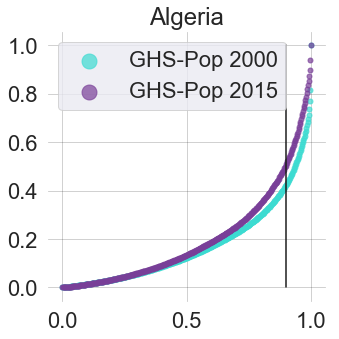

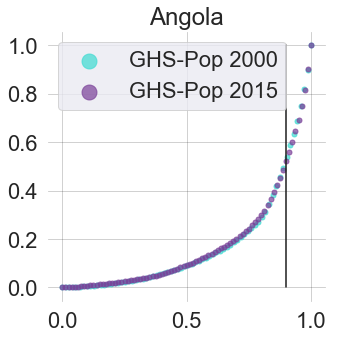

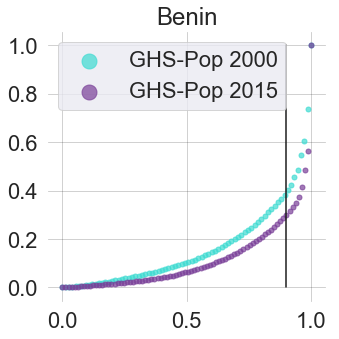

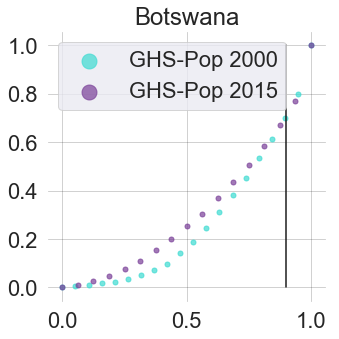

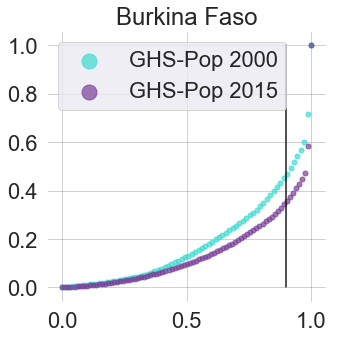

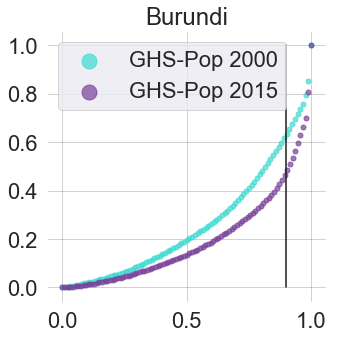

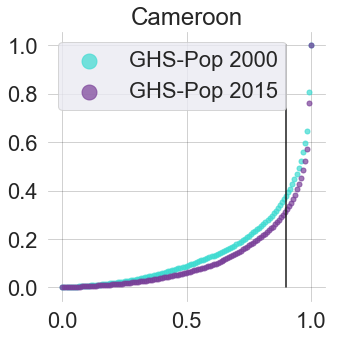

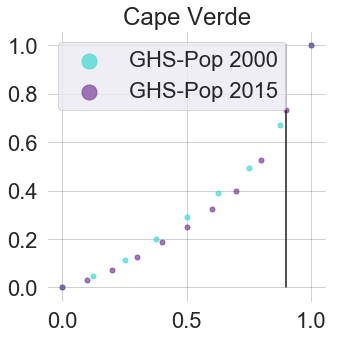

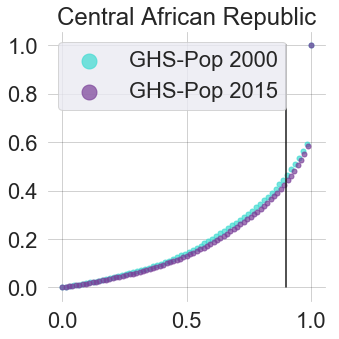

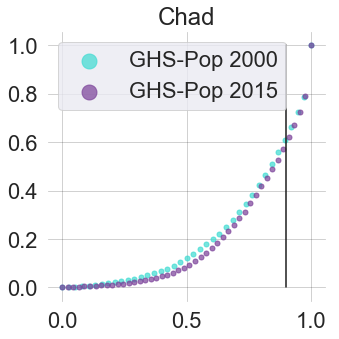

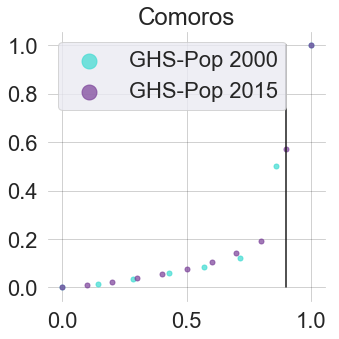

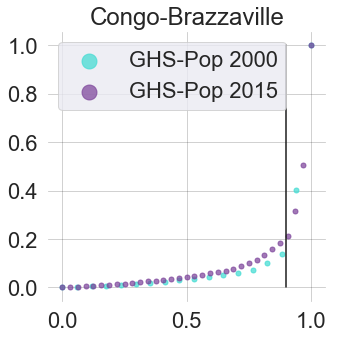

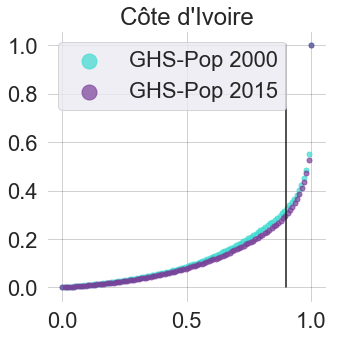

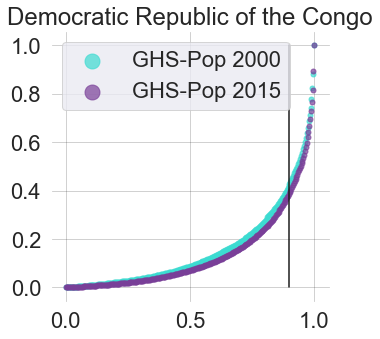

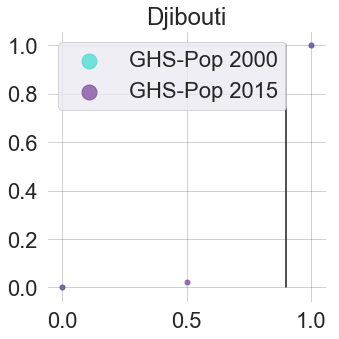

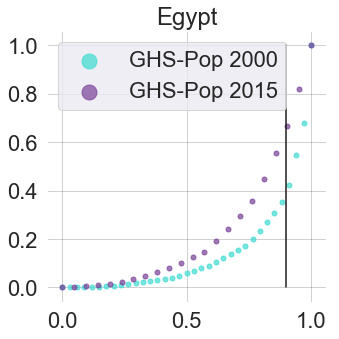

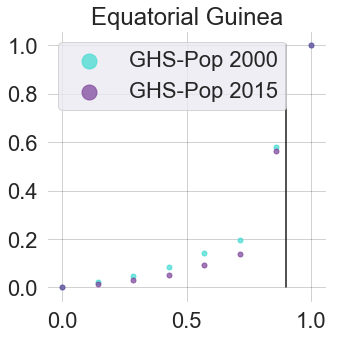

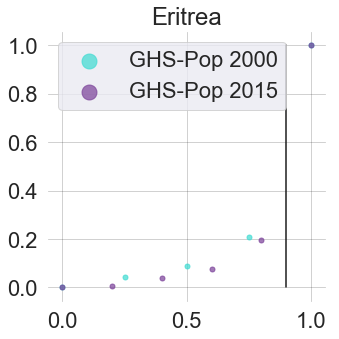

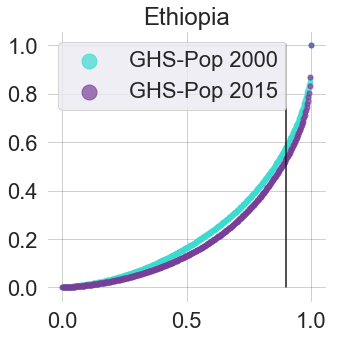

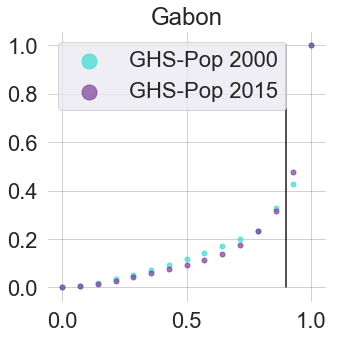

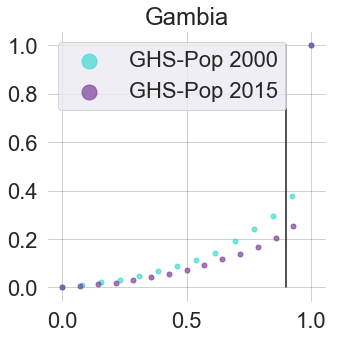

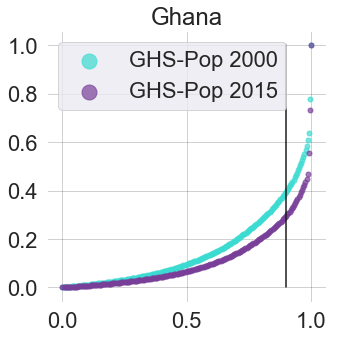

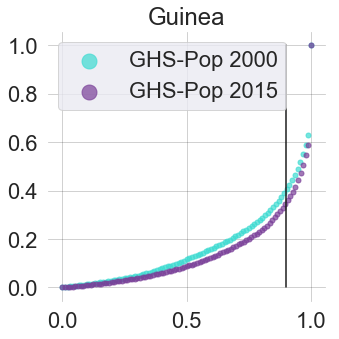

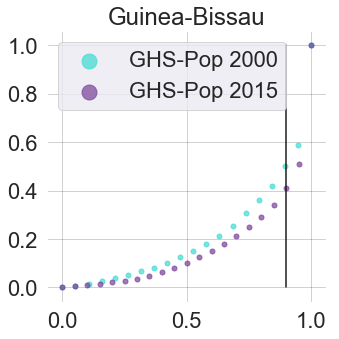

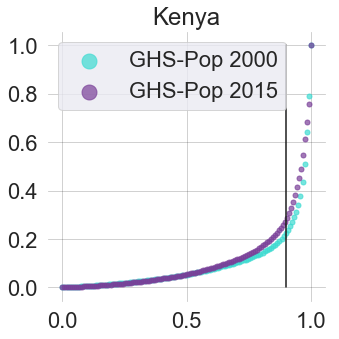

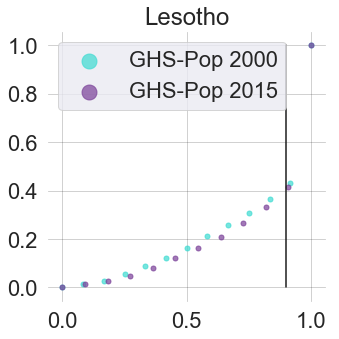

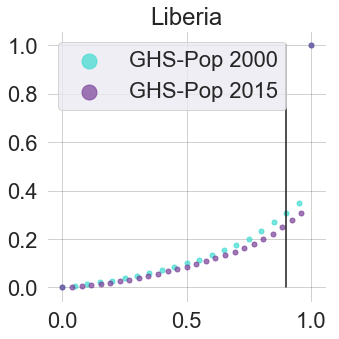

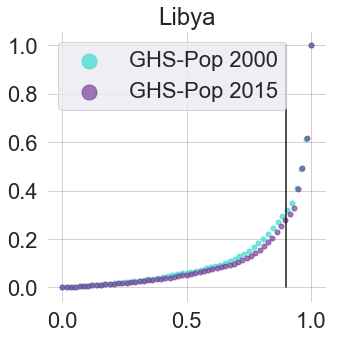

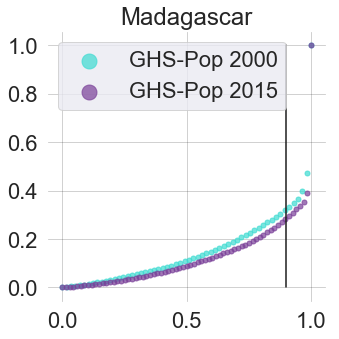

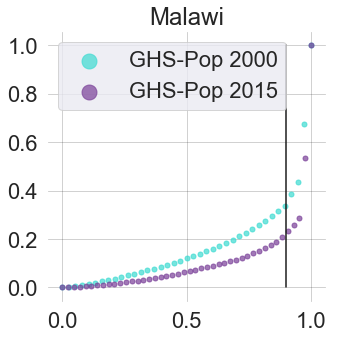

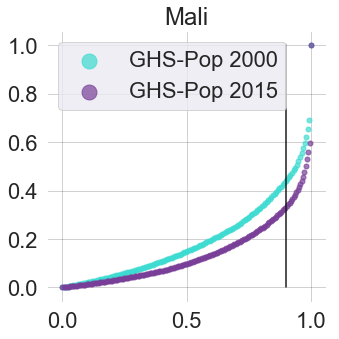

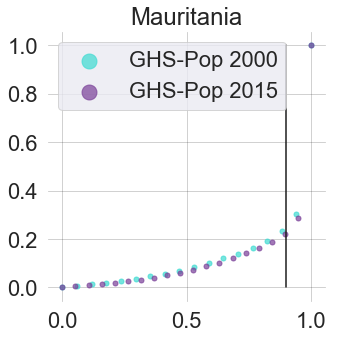

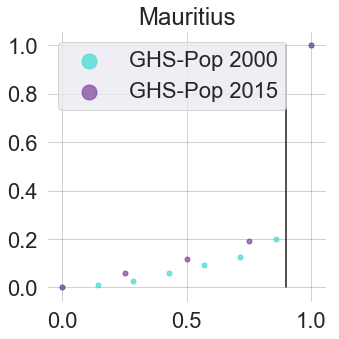

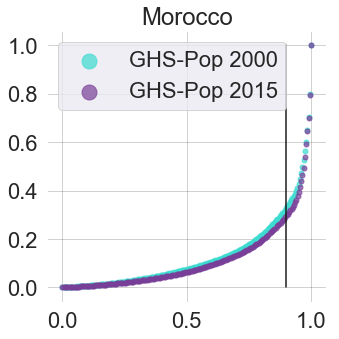

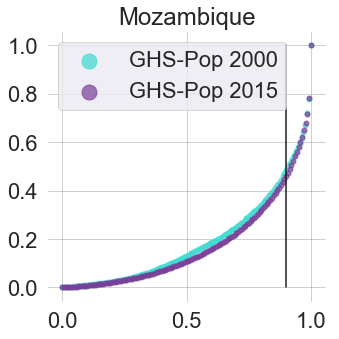

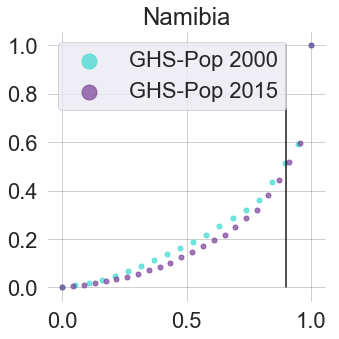

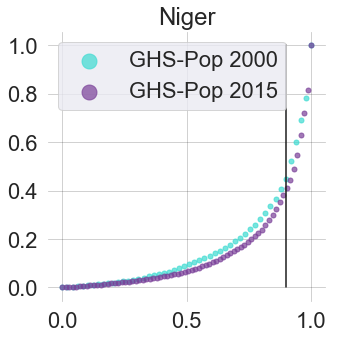

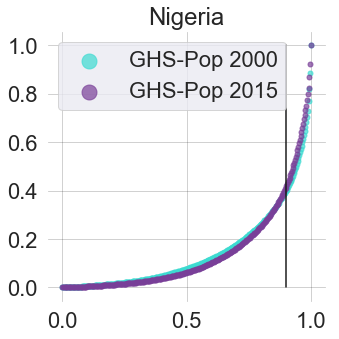

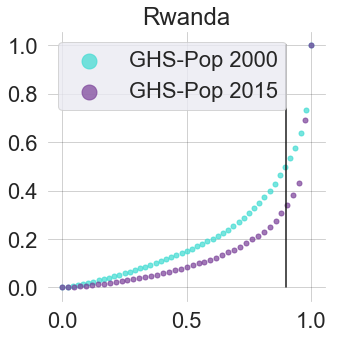

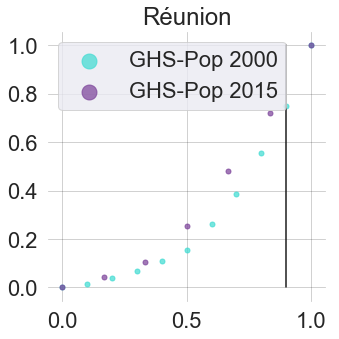

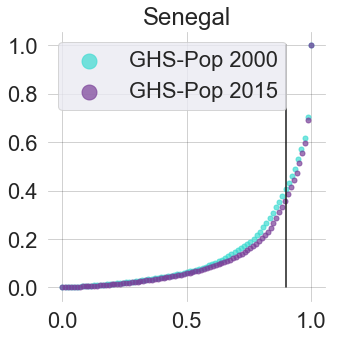

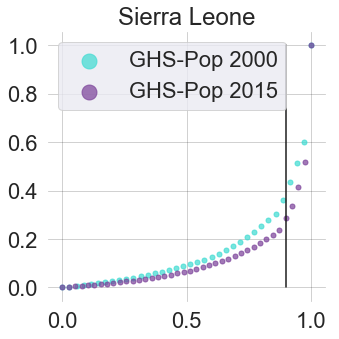

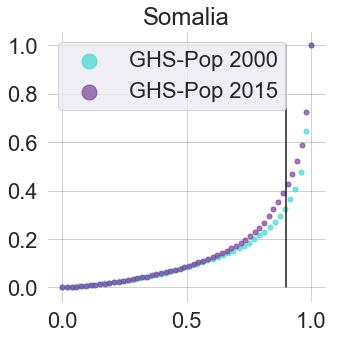

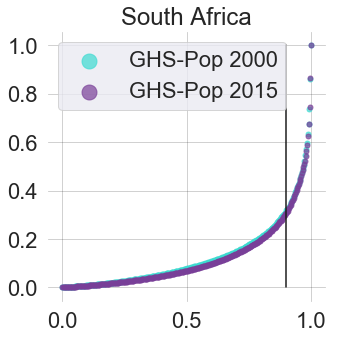

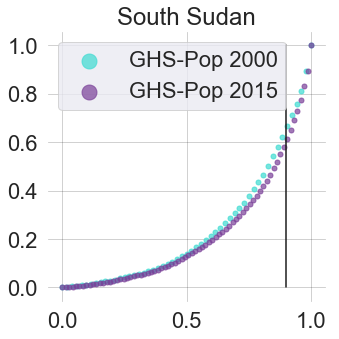

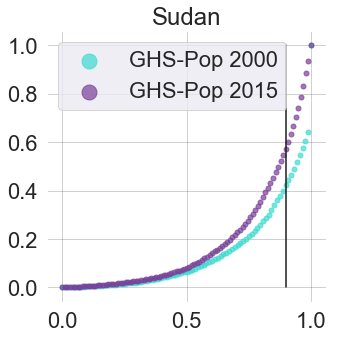

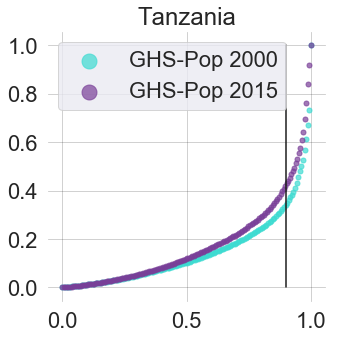

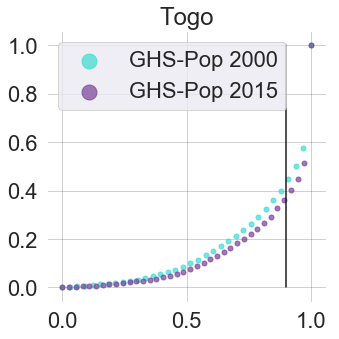

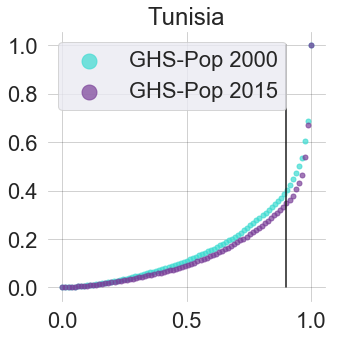

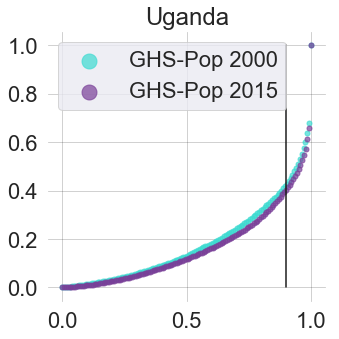

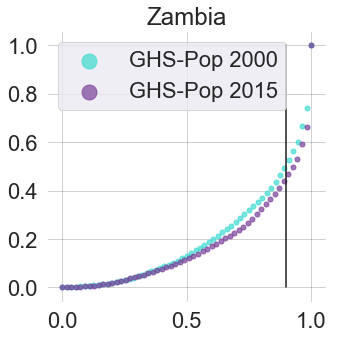

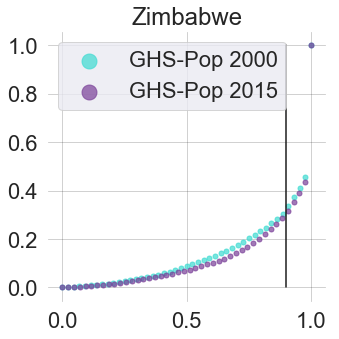

In [17]:
# Lorenz for All Countries

data1 = GHS2000[GHS2000.PopTot < 5*10**6]
data2 = GHS2015[GHS2015.PopTot < 5*10**6]

for country in countries: 
    
    test1 = data1[data1['country'] == country]
    test2 = data2[data2['country'] == country]

    X = np.sort(np.array(test1.PopTot))
    Y = np.sort(np.array(test2.PopTot))
    
    # Data for curve one
    X_lorenz = X.cumsum() / X.sum()
    X_lorenz = np.insert(X_lorenz, 0, 0)
    X_lorenz[0], X_lorenz[-1]

    # Data for curve two 
    Y_lorenz = Y.cumsum() / Y.sum()
    Y_lorenz = np.insert(Y_lorenz, 0, 0)
    Y_lorenz[0], Y_lorenz[-1]
    
    # Lorenz Curve Plot

    ## Size & number
    sns.set(font_scale=2)
    fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(5, 5))


    # Curve Plots 
    # Alpha for Botswana and S. Leone is 0.7, else 0.5
    ax1.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, # colors : #3cdbd1 blue (2000) # 793F98 purple (2015)
               marker='.', color='#3cdbd1', s=100, alpha = 0.7)

    ax1.scatter(np.arange(Y_lorenz.size)/(Y_lorenz.size-1), Y_lorenz, 
               marker='.', color='#793F98', s=100, alpha = 0.7)

    # Title
    plt.title(country)


    # Legend
    leg = ['GHS-Pop 2000', 'GHS-Pop 2015']
    plt.legend(leg,loc=2, markerscale=3)

    # Set Color
    plt.grid(b=True, color = 'k', alpha = 0.2, marker = '.')

    # plt.setp(ax1.xaxis.get_gridlines(), clip_path = [0,1])
    # plt.setp(ax1.yaxis.get_gridlines(), clip_path = [[0,0], [1,1]])
    plt.figure.frameon = True
    ax1.set_facecolor('White')

    ## line plot of of 90% 40% 
    ax1.plot([0.9,0.9], [0,1] , color='k', alpha = 1)

    fig.savefig('/Users/cascade/Desktop/Lorenz20190507/'+country+'_Lorenz.png', dpi=300)

In [21]:
# Select Data Zipf's law

# All Africa
area = 'Africa'
data1 = np.sort(np.array(GHS2000.PopTot))
data2 = np.sort(np.array(GHS2015.PopTot))

# By country 
# col = 'country' # column
# area = 'Ethiopia' # geography to distribut 

# data1 = np.sort(np.array(GHS2000[GHS2000[col] == area].PopTot))
# data2 = np.sort(np.array(GHS2015[GHS2015[col] == area].PopTot))

print(len(data1))
print(len(data2))

# Set Limits
data1 = data1[(data1 < 5*10**6)]
data2 = data2[(data2 < 5*10**6)]

print(len(data1))
print(len(data2))

X1_zipf = data1 #sort the values
Y1_zipf = list(range(1, len(X1_zipf)+1)) # make a range
Y1_zipf = Y1_zipf[::-1] # Re order range

X1_zipf_log = np.log(X1_zipf)
Y1_zipf_log = np.log(Y1_zipf)

X2_zipf = data2
Y2_zipf = list(range(1, len(X2_zipf)+1))
Y2_zipf = Y2_zipf[::-1]

X2_zipf_log = np.log(X2_zipf)
Y2_zipf_log = np.log(Y2_zipf)

4486
4784
4481
4773


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


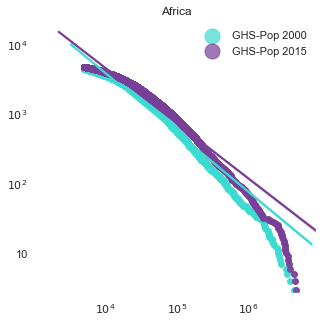

In [26]:
# Zipf's law

## Size & number
sns.set(font_scale=1)
fig, ax1 = plt.subplots(nrows=1, ncols=1,  figsize=(5, 5))

# Plot  # colors : #3cdbd1 blue (2000) #793F98 purple (2015)
plt.scatter(X1_zipf_log, Y1_zipf_log , marker='.', color='#3cdbd1', s=100, alpha = 0.7)
plt.scatter(X2_zipf_log, Y2_zipf_log , marker='.', color='#793F98', s=100, alpha = 0.7)

# Legend
leg = ['GHS-Pop 2000', 'GHS-Pop 2015']
plt.legend(leg,loc=1, markerscale=3, facecolor = 'white', edgecolor = 'white')

# Fit Lines
sns.regplot(X1_zipf_log, Y1_zipf_log, color = '#3cdbd1')
sns.regplot(X2_zipf_log, Y2_zipf_log, color = '#793F98')

# Title
plt.title(area)

# Labels
plt.xlabel('')
plt.ylabel('')

# Set Ticks
plt.xticks([np.log(10**4), np.log(10**5), np.log(10**6), np.log(10**7)], 
           ['$10^4$', '$10^5$', '$10^6$', '$10^7$'])

plt.yticks([np.log(10), np.log(100), np.log(1000), np.log(10000),  np.log(100000)], 
           ['10', '$10^2$', '$10^3$', '$10^4$', '$10^5$'])

# Set Background Color
ax1.set_facecolor('White')

axes = plt.gca()
axes.set_xlim([7,16])
#axes.set_xlim([min(X2_zipf_log), max(X2_zipf_log)])
axes.set_ylim([1,10])

fig.savefig('/Users/cascade/Desktop/'+area+'_Zipf.png', dpi=700)

### Counts

In [ ]:
country = 'Kenya'
test = GHS2000[GHS2000['country'] == country]
test = test[test['PopTot'] > 10**6]
test